In [13]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pandas.read_csv("reviews.csv", parse_dates = ['Timestamp'])

In [17]:
data.head()

,Course Name,Timestamp,Rating,Comment,Day
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02


### Plotting data by days

C:\Users\quang\AppData\Local\Temp\ipykernel_14684\1671759823.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_average = data.groupby(['Day']).mean()


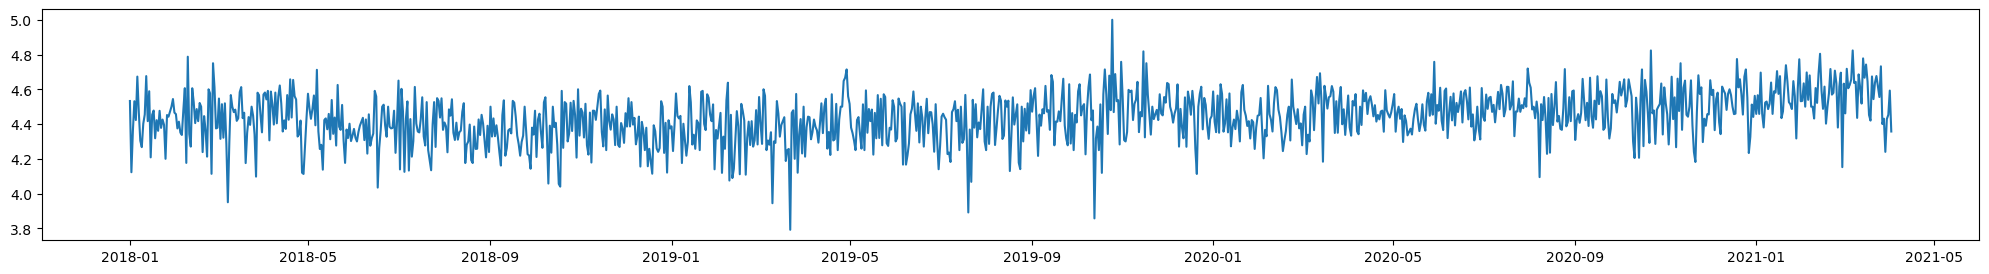

In [22]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()

plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])


### Plotting data by weeks

C:\Users\quang\AppData\Local\Temp\ipykernel_14684\1053712494.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week_average = data.groupby(['Week']).mean()


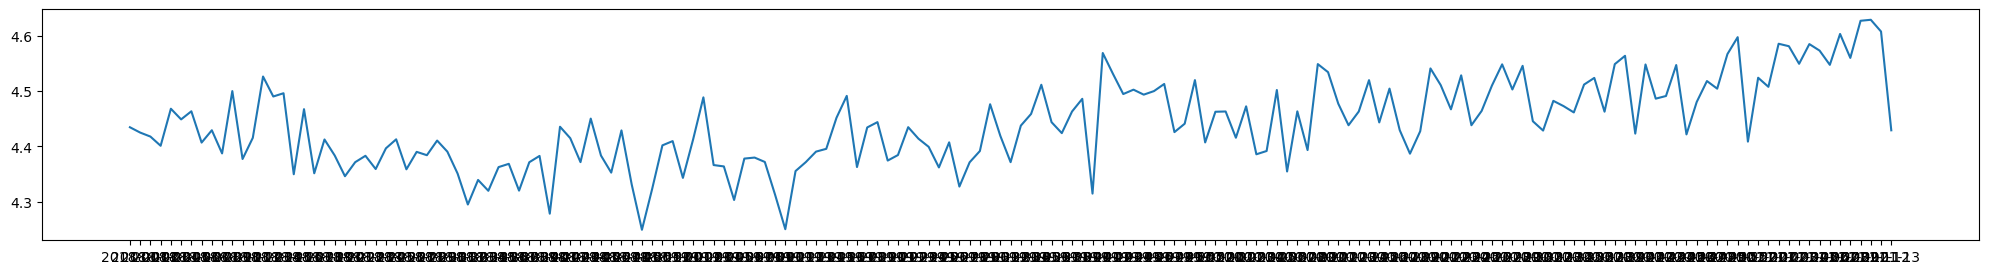

In [25]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()

plt.figure(figsize=(25,3))
plt.plot(week_average.index, week_average['Rating'])


### Plotting data by months

C:\Users\quang\AppData\Local\Temp\ipykernel_14684\3597239009.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_average = data.groupby(['Month']).mean()


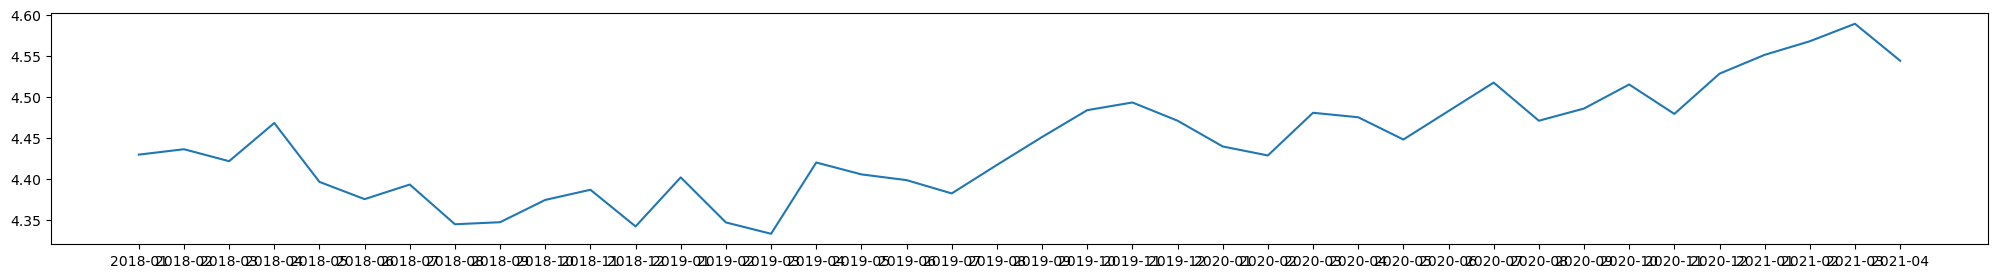

In [27]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()

plt.figure(figsize=(25,3))
plt.plot(month_average.index, month_average['Rating'])

### Average Rating by month by course

<AxesSubplot:xlabel='Month'>

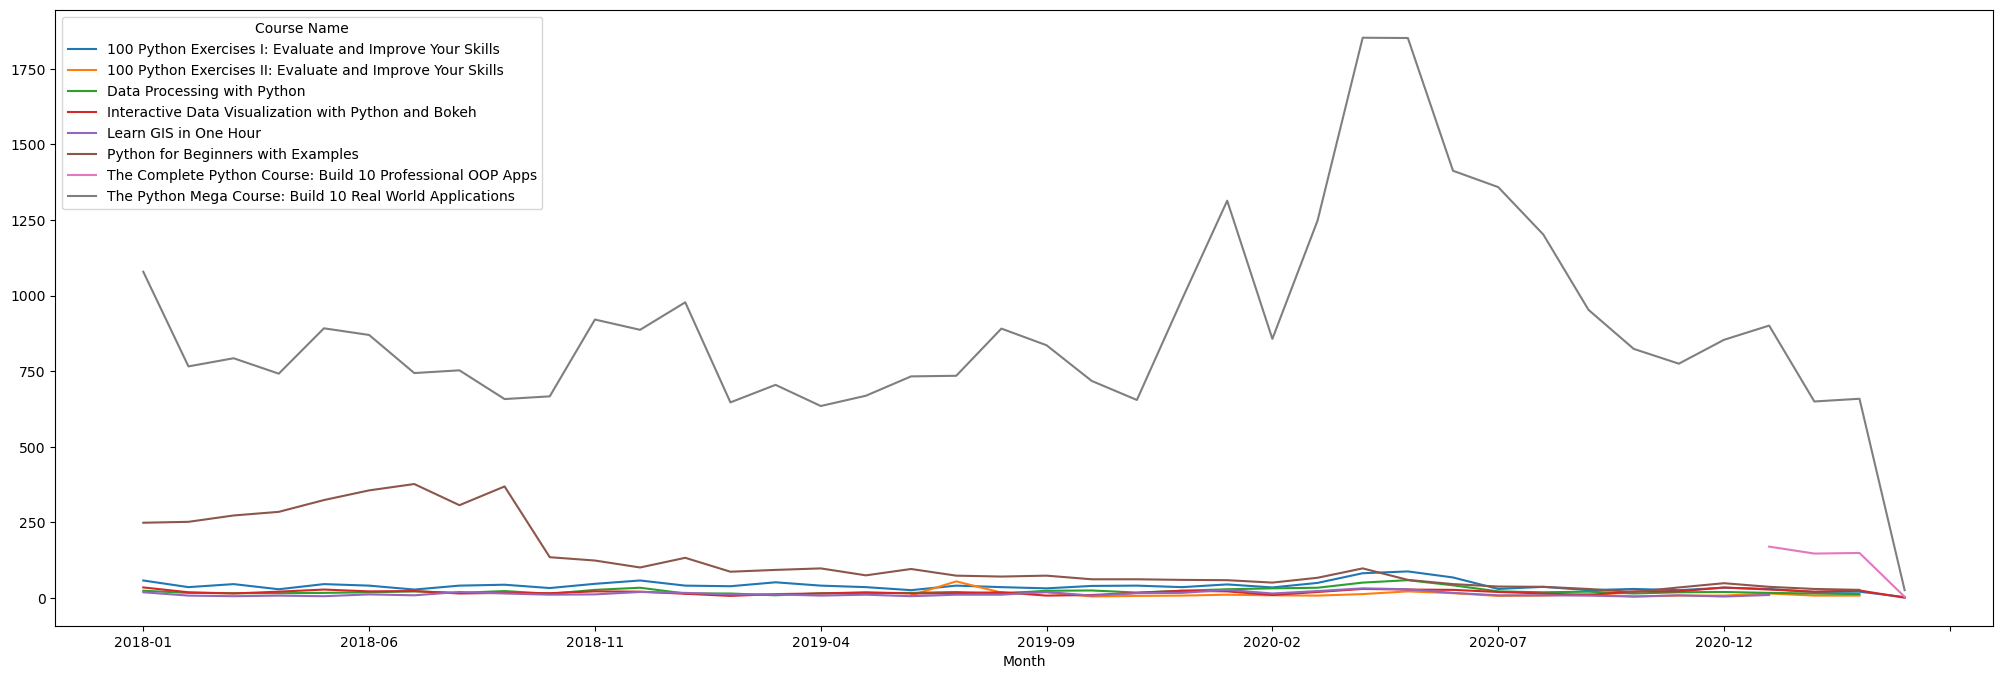

In [37]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()

month_average_crs.plot(figsize = (25,8))

### What day are people the happiest?

C:\Users\quang\AppData\Local\Temp\ipykernel_14684\3582330467.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekday_average = data.groupby(['Weekday', 'dayNumber']).mean()


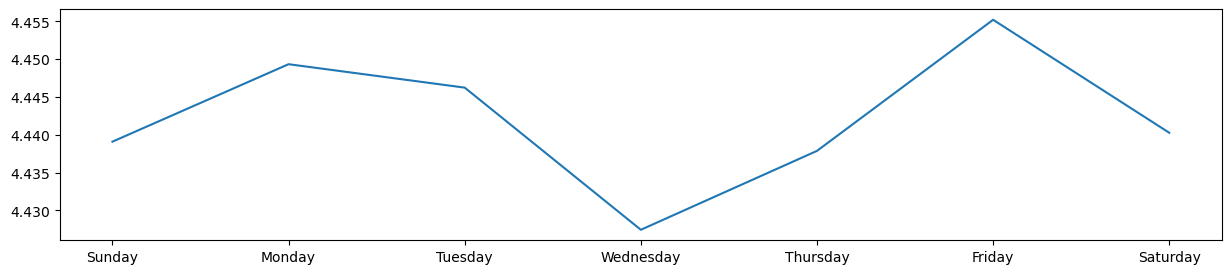

In [44]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['dayNumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'dayNumber']).mean()
weekday_average = weekday_average.sort_values(['dayNumber'])

plt.figure(figsize=(15,3))
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])